## XGBoost - Breast Cancer

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [3]:
url="https://raw.githubusercontent.com/prashant-kikani/breast-cancer-detection/refs/heads/master/breast-cancer-data.csv"
df = pd.read_csv(url)
df.shape

(569, 33)

In [4]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Cleaning


In [5]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 31)

### Class Distribution

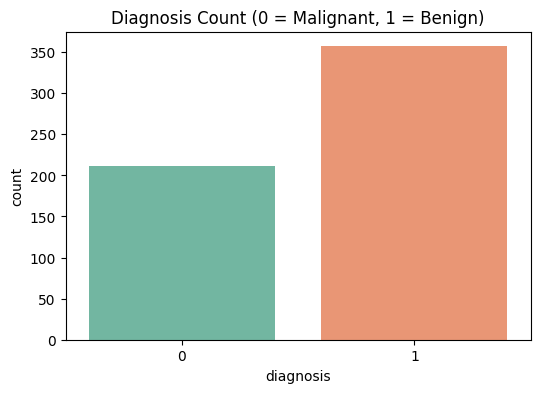

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title('Diagnosis Count (0 = Malignant, 1 = Benign)')
plt.show()

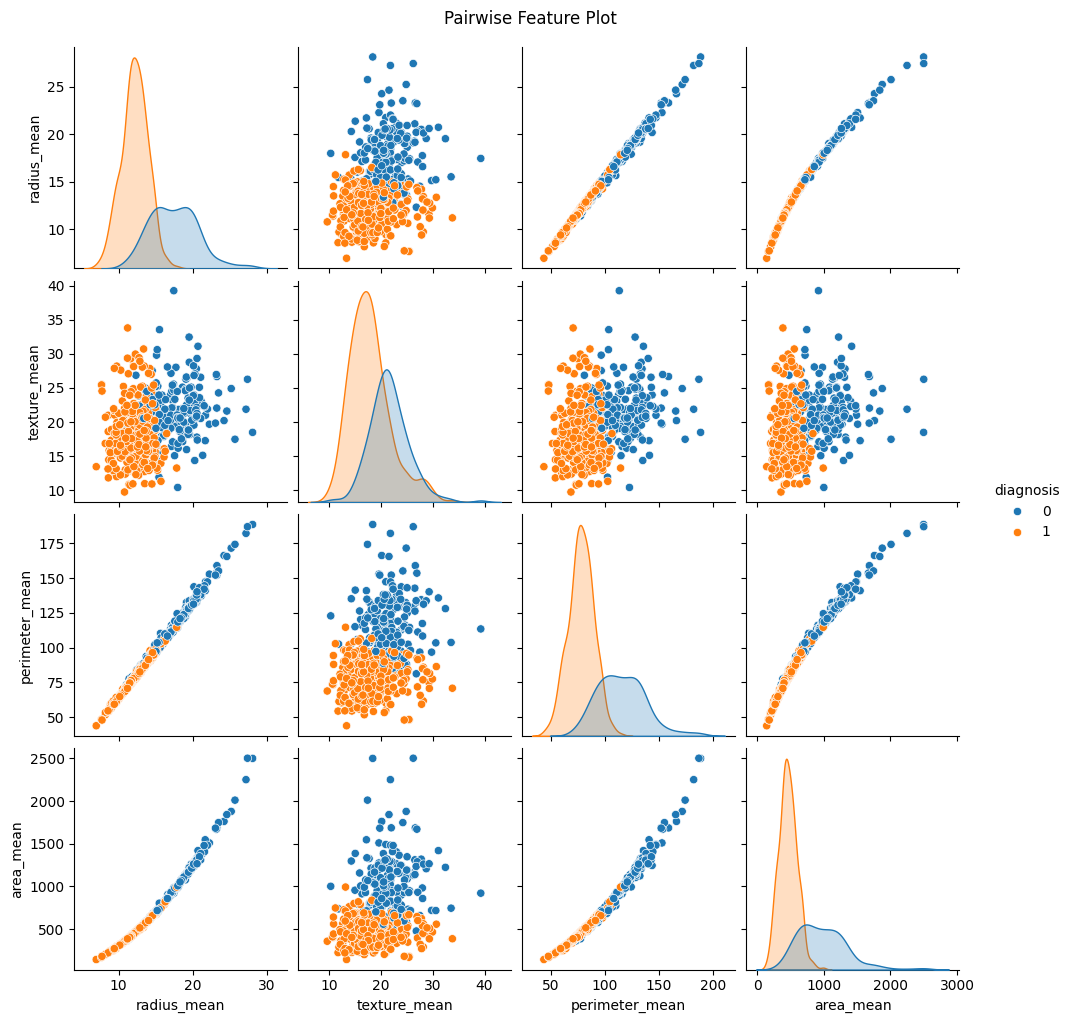

In [8]:
# 3. Pairplot (Sample of 4 features)
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis')
plt.suptitle("Pairwise Feature Plot", y=1.02)
plt.show()

### Data Preparation

In [9]:
# Prepare Data
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.175, random_state=0)

In [10]:
# 4. Baseline - Dummy Classifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, Y_train)
y_dummy = dummy.predict(X_test)

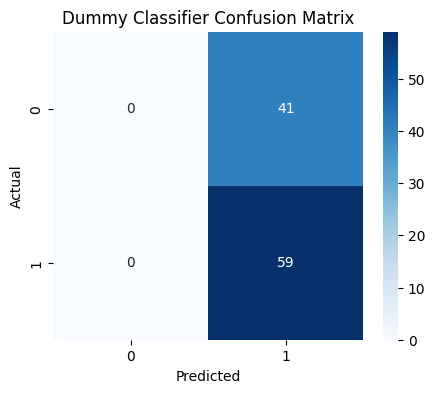

Dummy Classifier Accuracy: 59.00%


In [11]:
# Confusion Matrix for Dummy
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_dummy), annot=True, cmap='Blues', fmt='d')
plt.title("Dummy Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Dummy Accuracy
print("Dummy Classifier Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_dummy)*100))

### XGBoost Classifier

In [22]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

### Evaluation Metrics


In [23]:
print("\nXGBoost Model Evaluation:")
print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, y_pred)*100))
print("Precision: {:.2f}".format(precision_score(Y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(Y_test, y_pred)))
print("F1 Score: {:.2f}".format(f1_score(Y_test, y_pred)))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


XGBoost Model Evaluation:
Accuracy: 97.00%
Precision: 0.97
Recall: 0.98
F1 Score: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.98      0.97        59

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



### Confusion matrix for XGBoost

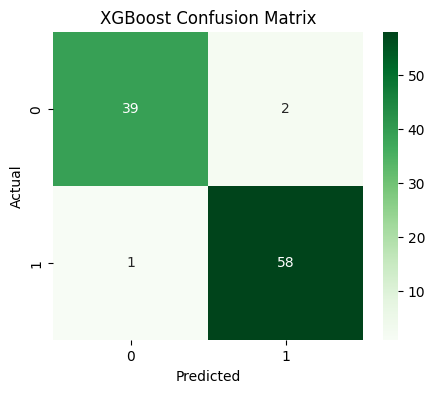

In [24]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='Greens', fmt='d')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Feature Importance

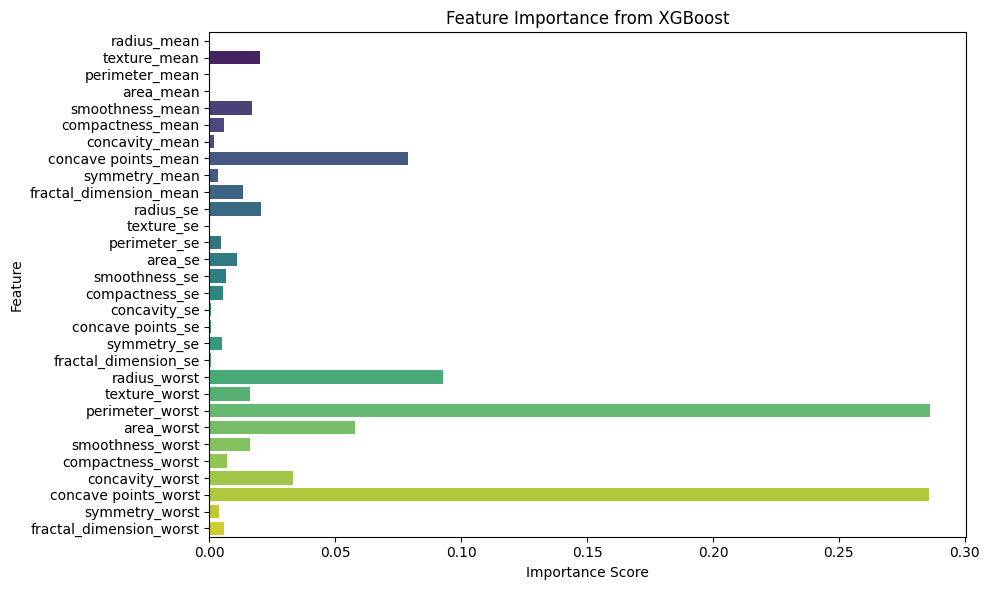

In [25]:
plt.figure(figsize=(10,6))
importance = model.feature_importances_
features = X.columns
sns.barplot(x=importance, y=features, palette='viridis')
plt.title("Feature Importance from XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()